<a href="https://colab.research.google.com/github/Komall007/data-science/blob/main/irisEDAbyKOMAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to the Exploratory Data Analysis (EDA) of the famous Iris dataset! 🦋✨**

In this project, we will dive deep into understanding the Iris dataset through a variety of visualizations, statistical analyses, and key insights. Let's explore the features of different species of Iris flowers and uncover hidden patterns in the data. 🌿

**🌟 Goal of This Analysis**:

By the end of this project, we'll have a better understanding of the Iris dataset and its key features

🧑‍💻 Our Approach:
Importing Data 📥: Loading the Iris dataset.

Data Cleaning 🧽: Checking for missing values and handling any inconsistencies.

Visualization 🎨: Using plots like histograms, box plots, and scatter plots to explore data patterns.

Statistical Analysis 📊: Summarizing the data using measures like mean, median, and quartiles.

Feature Exploration 🔍: Analyzing how different features relate to each other and to the Iris species.

**Importing required libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

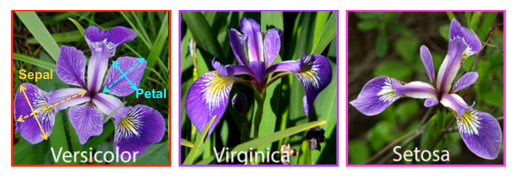

In [ ]:
img = mpimg.imread('/content/1_gwmXliaxIBkY4NQBhoe9JQ.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
iris = pd.read_csv("/content/Iris.csv")

In [ ]:

print(iris.shape)       #tells about how many rows and columns in the dataset
print(iris.columns)       #names the specific columns
print(iris.value_counts)     #tells abt no. of data point present in each class of dataset
iris.drop_duplicates(inplace=True)      #ensures uniquesness in data
iris.rename(columns={'SepalLengthCm':'s','SepalWidthCm':'sw','PetalLengthCm':'pl','PetalWidthCm':'pw'},inplace=True)
print(iris.head())

(147, 5)
Index(['s', 'sw', 'pl', 'pw', 'Species'], dtype='object')
<bound method DataFrame.value_counts of        s   sw   pl   pw         Species
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[147 rows x 5 columns]>
     s   sw   pl   pw      Species
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


### this is the info tag

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   s        150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,s,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1st approach:
📅2D scatter

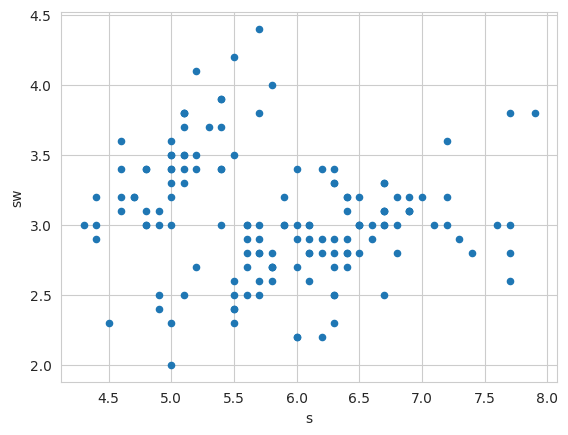

In [ ]:
iris.plot(kind='scatter', x= 's', y='sw');
plt.show();

 since this approach didnt tell us much abt the particular sepecies or how to differentiate the species, we try 2D scatter with color coding


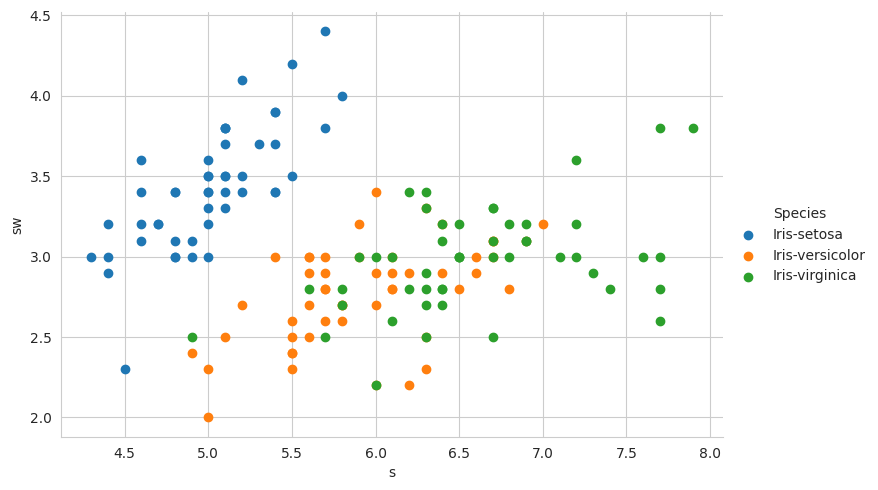

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue="Species", height=5, aspect=1.5).map(plt.scatter, "s", "sw").add_legend();
plt.show();


#2nd approach: Pair plot
here we take pairs from given 4 data sets i.e 4C2=6, we do this to visualize data more clearly as it is not possible in 4D,5D, or nD

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


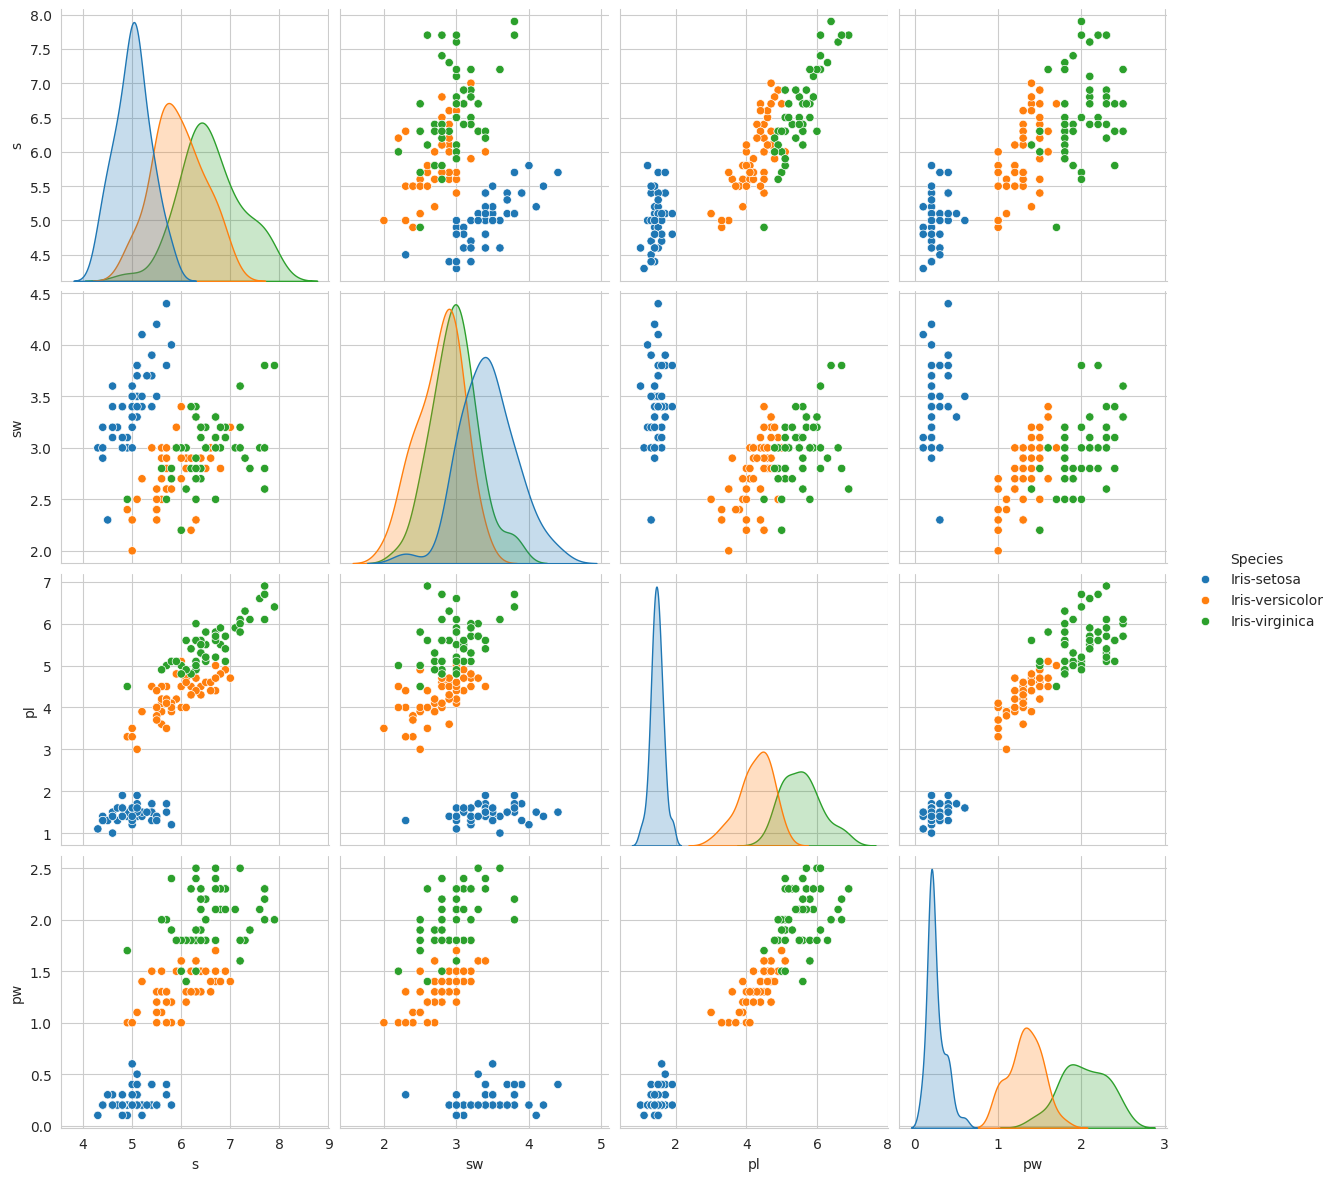

In [ ]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(iris, hue="Species", size=3);
plt.show();

we get basically a 4*4 matrix (right now we ignore diagonaln elements as they represent histogram; also in total we have 16plots),

where lower triangular matrix is mirror image of upper triangular matrix or vice versa

Here we observe that for setosa the petal length should be less than 2 and petal width should be less than 1

And by boxing a particular region that is if petal width <2 and >=1 AND petal lengt <5 and >2.5 then it is versicolor with some error

i.e petal length and width are important aspect as setosa can easily be verified even in 2D
 NOTE: Pair plots are useful for small dimensions only i.e upto 6D

# 📊Univariate is one variable analysis

*  To understand which of the four sets is more important than other we observe histogram for each dataset

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

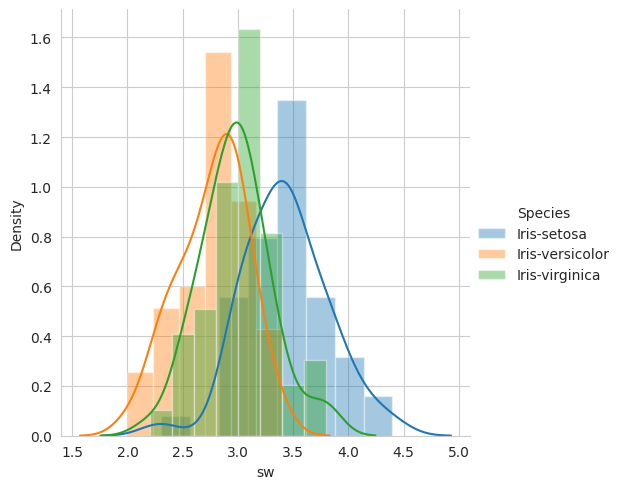

In [ ]:
sns.FacetGrid(iris,hue='Species',height=5).map(sns.distplot,'sw').add_legend();
plt.show();

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

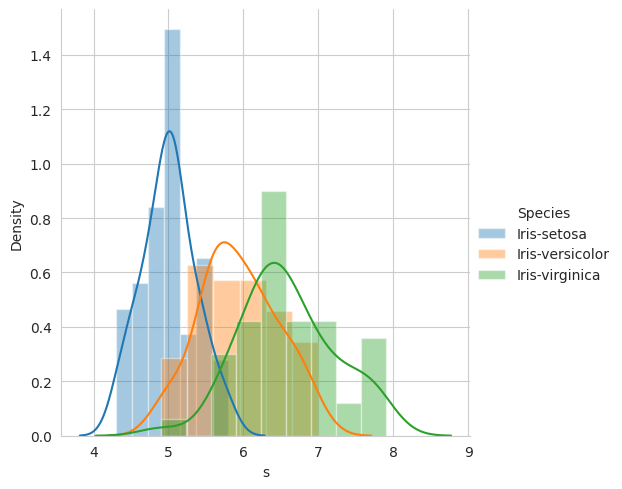

In [ ]:
sns.FacetGrid(iris,hue='Species',height=5).map(sns.distplot,'s').add_legend();
plt.show();


In sepal length, not even setosa is separted where as in sepal width everything overlaps

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

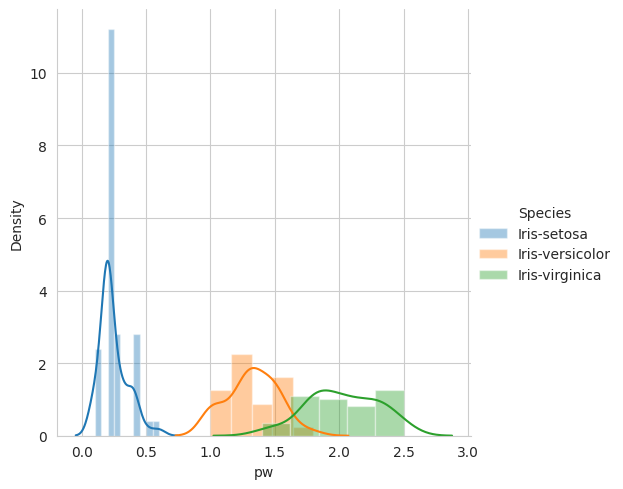

In [ ]:
sns.FacetGrid(iris,hue='Species',height=5).map(sns.distplot,'pw').add_legend();
plt.show();

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

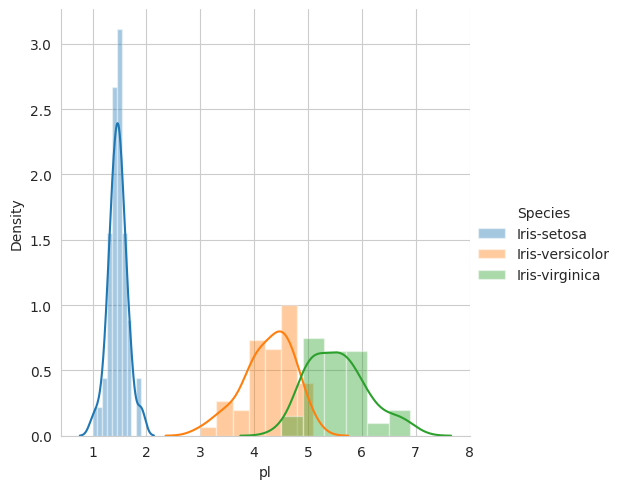

In [ ]:
sns.FacetGrid(iris,hue='Species',height=5).map(sns.distplot,'pl').add_legend();
plt.show();

Petal length is better between petal length and width. Petal length>petal width>sepal length>sepal width is the observation here

#🎯Mean

In [ ]:
print(iris['s'].mean())
print(iris['sw'].mean())
print(iris['pw'].mean())
print(iris['pl'].mean())

5.856462585034014
3.05578231292517
1.2088435374149662
3.780272108843538


mean tells about overall behaviour of flower or datas

However, the mean can be sensitive to outliers. So if there are extreme values (very high or low), the mean can shift and might not represent the "typical" value of the data.

Example: If you're looking at petal length in the Iris dataset, the mean gives you a rough idea of where most data points fall on average.

2. Median (Middle Value)
What it tells us:

The median is the middle value of the data when sorted in ascending order. If there’s an even number of values, it’s the average of the two middle numbers.

💡Why it’s useful:

The median is less sensitive to outliers than the mean. It represents the true central value when the data is skewed or contains extreme values.

Example: If there are extreme outliers in petal length (e.g., very large or very small petals), the median will give a better idea of the typical petal size than the mean.

#🧮 Median, percentile,quantile,IQR

In [ ]:
print("median:")
print(iris['s'].median())
print(iris['sw'].median())
print(iris['pw'].median())
print(iris['pl'].median())

print("quantile:")
print(iris['s'].quantile())
print(iris['sw'].quantile())
print(iris['pw'].quantile())
print(iris['pl'].quantile())

median:
5.8
3.0
1.3
4.4
quantile:
5.8
3.0
1.3
4.4


Quantiles divide the data into equal intervals. Key quantiles include:

Q1 (1st Quartile): The 25th percentile, or the value below which 25% of the data falls.

Q2 (Median): The 50th percentile (middle value).

Q3 (3rd Quartile): The 75th percentile, or the value below which 75% of the data falls.



#📈 CDF:


[0.23809524 0.08843537 0.         0.02040816 0.05442177 0.17687075
 0.19047619 0.12244898 0.07482993 0.03401361]
[1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]


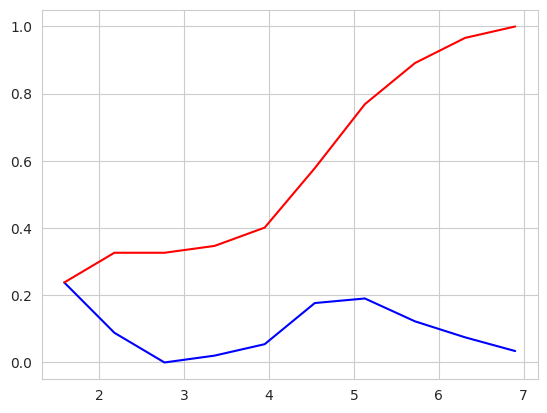

In [ ]:
counts,bin_edges=np.histogram(iris['pl'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, color="blue")
plt.plot(bin_edges[1:],cdf, color="red")
plt.show()

The PDF is typically a smooth curve, showing the distribution of petal lengths.

The CDF will start at 0 and gradually increase towards 1 as you reach the right side of the plot.

Suppose you want to know the likelihood that a petal length falls between 2.5 cm and 3.5 cm.

You can calculate this using the PDF by finding the area under the curve between these two points.

If you want to know the probability that the petal length is less than 3.0 cm, you can use the CDF, which will give you the cumulative probability up to that point.

#**📦Box plot(and whiskers):**
it's a visual summary of a dataset’s distribution. It's perfect for understanding:
1. Spread
2. Center
3. Outliers
4. Symmetry/skewness



What the Box Tells You:
Median:

You can quickly compare the central tendency (median) of petal lengths across different species.

For example, you might see that Setosa has a median petal length of 1.4 cm, while Versicolor and Virginica have much higher medians around 4.0 cm.

IQR (Interquartile Range):

The box's width indicates how spread out the middle 50% of the data is.

If you see that Setosa has a narrow box, it means that most of the Setosa flowers have similar petal lengths, whereas Versicolor might have a wider box, indicating more variability in petal lengths.

Whiskers & Outliers:

The whiskers show the range of petal lengths. If you see a long whisker, it means that there is a wider range of values outside the IQR.

Any points outside the whiskers are considered outliers. This can help identify rare flowers with extremely long or short petals that don’t follow the general pattern.

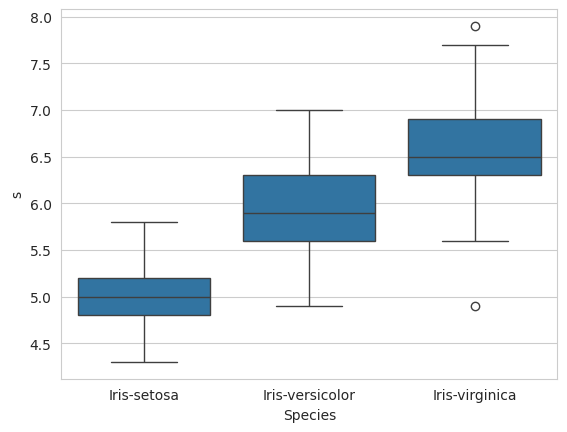

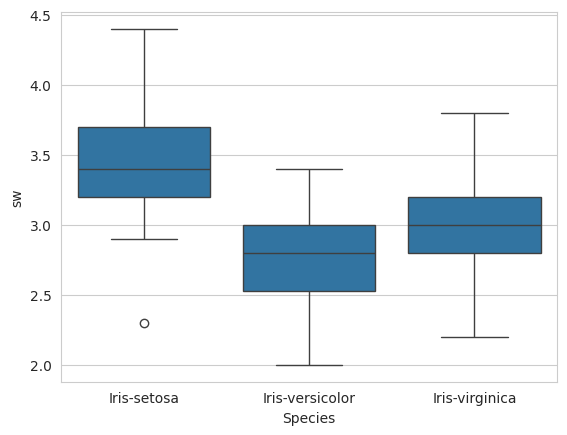

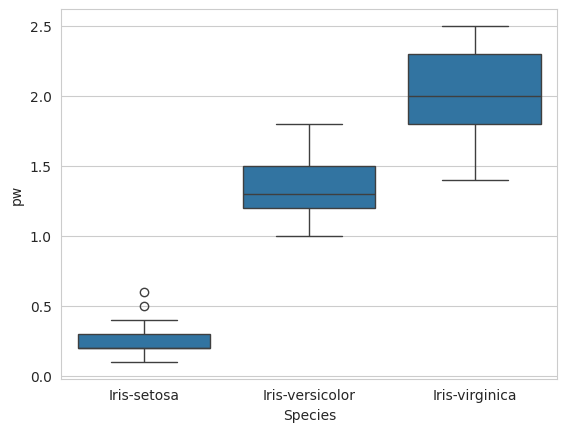

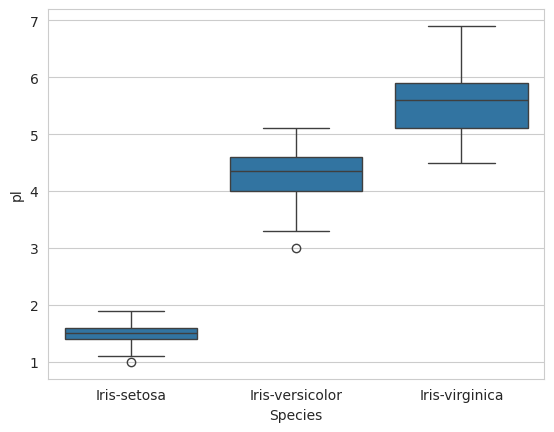

In [ ]:
sns.boxplot(x="Species", y="s", data=iris);
plt.show()
sns.boxplot(x="Species", y="sw", data=iris);
plt.show()
sns.boxplot(x="Species", y="pw", data=iris);
plt.show()
sns.boxplot(x="Species", y="pl", data=iris);
plt.show()

#**🎻Violin plot:**
combination of histograph and boxplot

📊 Interpretation Examples
1. Width of the Violin
Wider = More data in that range

Narrower = Fewer data points there

Symmetric width = symmetric distribution

2. Peaks or “Humps”
One hump = unimodal distribution

Two humps = bimodal (can’t see this in a box plot!)

3. Skewed Shapes
If the shape is thicker toward the top, the data is skewed high

If it’s thicker toward the bottom, it’s skewed low

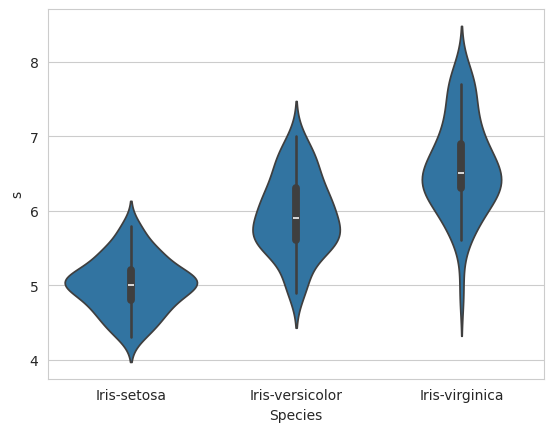

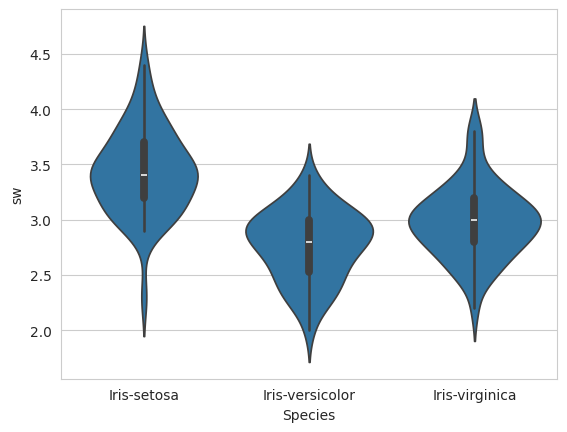

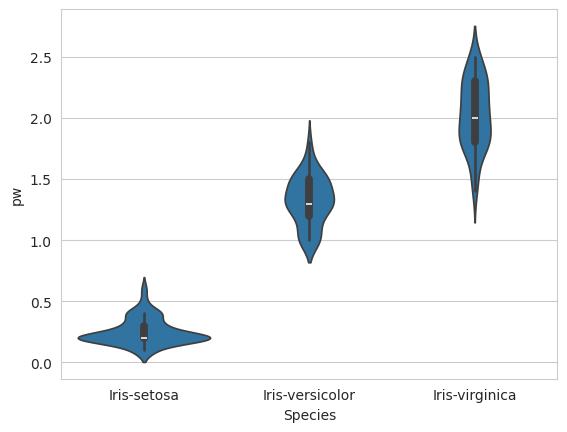

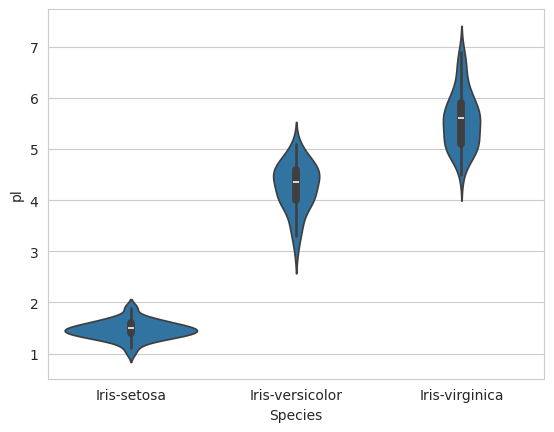

In [ ]:
sns.violinplot(x="Species", y="s", data=iris);
plt.show()
sns.violinplot(x="Species", y="sw", data=iris);
plt.show()
sns.violinplot(x="Species", y="pw", data=iris);
plt.show();
sns.violinplot(x="Species", y="pl", data=iris);
plt.show();

Setosa tends to have very small and tightly packed petal lengths.

Versicolor and Virginica might have overlapping ranges for petal length, but their distributions differ — one may have a higher concentration around a different value, or one may be more skewed.
Interpretation for petal length graph i.e pl:

Setosa: The plot is narrow with a clear peak at around 1.4 cm, suggesting all setosa flowers have similar petal lengths.

Versicolor: The plot is wider, with some spread, indicating variability in petal length among versicolor flowers.

Virginica: A similar trend to versicolor, but maybe with a slightly higher concentration of values in the higher range (longer petals).
_________________________________________________________________
If you look at petal width in versicolor, you might see two peaks (one for smaller flowers, one for larger flowers), which indicates two subgroups in the data

**🌌2D Density plot:** (also called contour plot)

It’s a smoothed version of a scatter plot using kernel density estimation (KDE) across two variables. Instead of plotting each point, it shows the density of points — like a heatmap or contour map.

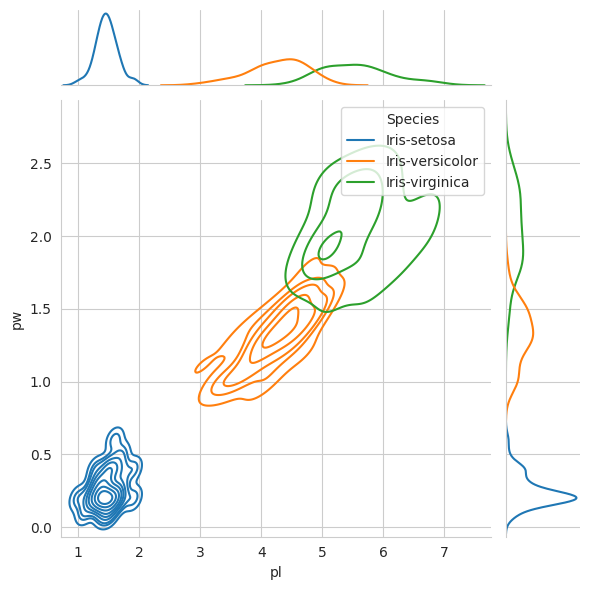

In [ ]:
sns.jointplot(x="pl", y="pw", data=iris, kind= "kde", hue="Species" );
plt.show();

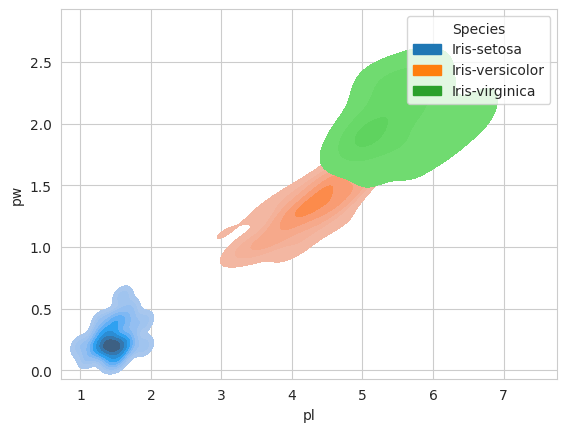

In [ ]:
sns.kdeplot(data=iris, x="pl", y="pw", hue="Species", fill=True)
plt.show()


## 🎻📦Box inside violin-

<Axes: >

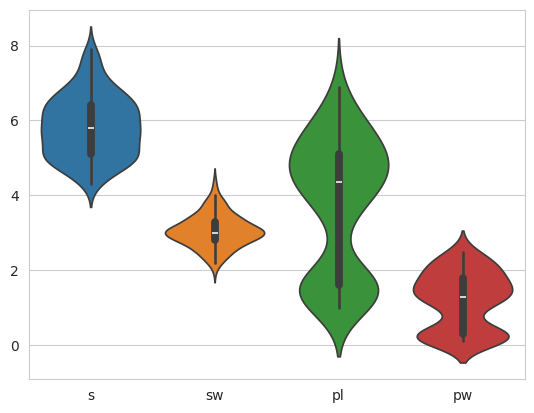

In [ ]:
sns.violinplot(data=iris, inner='box')


🌟 Conclusion for EDA on the Iris Dataset

Exploratory Data Analysis (EDA) of the Iris dataset gave us a deeper understanding of its features and how they relate to the species.
Here's a quick summary of what we found:

The Iris dataset has four key features:

sepal length 🌱, sepal width 🌿, petal length 🌸, and petal width 🌼.

Violin plots, box plots, and histograms showed that:

1. Petal length and petal width are the most distinguishing features between species, especially for Setosa, Versicolor and Virginica .

2. Setosa has much shorter and consistent petal dimensions compared to the other species.

3. Versicolor and Virginica overlap in petal dimensions but have some noticeable differences.

# New Section